<a href="https://colab.research.google.com/github/D1scoDancer/Bankruptcy-DA-Project/blob/main/Notebooks/Taiwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo
!pip install seaborn scikit-learn

# Импорты

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных

### Получение данных

In [3]:
# fetch taiwanese dataset
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)

# data (as pandas dataframes)
taiwanese_X = taiwanese_bankruptcy_prediction.data.features
taiwanese_y = taiwanese_bankruptcy_prediction.data.targets

# Анализ данных

## Тайвань

#### X

In [4]:
taiwanese_X

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818    

##### Корреляционный анализ

In [5]:
import pandas as pd
import numpy as np

# Загрузка датасета taiwanese_X
# Предположим, что taiwanese_X уже загружен как DataFrame

# Вычисление корреляционной матрицы
corr_matrix = taiwanese_X.corr().abs()

# Создание списка признаков для удаления
to_drop = set()

# Установим порог корреляции (например, 0.8)
threshold = 0.8

# Проход по корреляционной матрице
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# Удаление коррелирующих признаков
taiwanese_X_reduced = taiwanese_X.drop(columns=to_drop)

# Вывод количества признаков до и после удаления
print(f"Количество признаков до удаления: {taiwanese_X.shape[1]}")
print(f"Количество признаков после удаления: {taiwanese_X_reduced.shape[1]}")

# Вывод списка удаленных признаков
print("Удаленные признаки:", to_drop)

Количество признаков до удаления: 95
Количество признаков после удаления: 70
Удаленные признаки: {' Liability to Equity', ' After-tax net Interest Rate', ' Per Share Net profit before tax (Yuan ¥)', ' Operating profit/Paid-in capital', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Continuous interest rate (after tax)', ' Regular Net Profit Growth Rate', ' Operating Funds to Liability', ' Operating Profit Per Share (Yuan ¥)', ' Pre-tax net Interest Rate', ' Cash Flow to Sales', ' ROA(A) before interest and % after tax', ' Current Liability to Equity', ' Current Liability to Liability', ' Net Income to Total Assets', ' Net worth/Assets', ' ROA(B) before interest and depreciation after tax', ' Current Liabilities/Equity', ' Realized Sales Gross Margin', ' Net Value Per Share (C)', ' Current Liability to Assets', ' Net Value Per Share (A)', ' Net profit before tax/Paid-in capital', ' Equity to Long-term Liability'}


In [6]:
taiwanese_X_reduced

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                         0.302646             1.256969e-04   
1                                         0.303556             2.897851e-04   
2                                         0.302035             2.361297e-04   
3                                         0.303350             1.078888e-04   
4                                         0.303475             7.890000e+09   
...                                            ...                      ...   
6814                                      0.303510             1.510213e-04   
6815                                      0.303520             5.220000e+09   
6816                                      0.303512             2.509312e-04   
6817                                      0.303498             1.236154e-04   
6818                                      0.313415             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.000000   
1                             6.470647e-04       0.000000   
2                             7.900790e-04       0.000000   
3                             4.490449e-04       0.000000   
4                             6.860686e-04       0.000000   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Net Value Per Share (B)  ...   CFO to Assets   Cash Flow to

##### Вариационный анализ

Удаление признаков с низкой вариацией, так как они, вероятно, не несут важной информации.

In [7]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
taiwanese_X_reduced_2 = selector.fit_transform(taiwanese_X_reduced)

In [9]:
print(f"Количество признаков до: {taiwanese_X_reduced.shape[1]}")
print(f"Количество признаков после: {taiwanese_X_reduced_2.shape[1]}")

Количество признаков до: 70
Количество признаков после: 24


In [12]:
selected_features = selector.get_support(indices=True)
selected_feature_names = taiwanese_X_reduced.columns[selected_features]

# Создать новый DataFrame с оставшимися признаками
X_reduced_df = pd.DataFrame(taiwanese_X_reduced_2, columns=selected_feature_names)

In [13]:
X_reduced_df

Operating Expense Rate   Research and development expense rate  \
0                1.256969e-04                            0.000000e+00   
1                2.897851e-04                            0.000000e+00   
2                2.361297e-04                            2.550000e+07   
3                1.078888e-04                            0.000000e+00   
4                7.890000e+09                            0.000000e+00   
...                       ...                                     ...   
6814             1.510213e-04                            4.500000e+09   
6815             5.220000e+09                            1.440000e+09   
6816             2.509312e-04                            1.039086e-04   
6817             1.236154e-04                            2.510000e+09   
6818             1.431695e-03                            0.000000e+00   

       Interest-bearing debt interest rate   Revenue Per Share (Yuan ¥)  \
0                             7.250725e-04                     0.017560   
1                             6.470647e-04                     0.021144   
2                             7.900790e-04                     0.005944   
3                             4.490449e-04                     0.014368   
4                             6.860686e-04                     0.029690   
...                                    ...                          ...   
6814                          1.790179e-04                     0.020766   
6815                          2.370237e-04                     0.023050   
6816                          0.000000e+00                     0.044255   
6817                          2.110211e-04                     0.031535   
6818                          5.900000e+08                     0.000665   

       Total Asset Growth Rate   Net Value Growth Rate   Current Ratio  \
0                 4.980000e+09                0.000327        0.002259   
1                 6.110000e+09                0.000443        0.006016   
2                 7.280000e+09                0.000396        0.011543   
3                 4.880000e+09                0.000382        0.004194   
4                 5.510000e+09                0.000439        0.006022   
...                        ...                     ...             ...   
6814              7.070000e+09                0.000450        0.010451   
6815              5.220000e+09                0.000445        0.009259   
6816              5.990000e+09                0.000435        0.038424   
6817              7.250000e+09                0.000529        0.012782   
6818              9.350000e+09                0.000519        0.051348   

       Quick Ratio   Total debt/Total net worth  \
0         0.001208                     0.021266   
1         0.004039                     0.012502   
2         0.005348                     0.021248   
3         0.002896                     0.009572   
4         0.003727                     0.005150   
...            ...                          ...   
6814      0.005457                     0.006655   
6815      0.006741                     0.004623   
6816      0.035112                     0.001392   
6817      0.007256                     0.003816   
6818      0.040897                     0.000461   

       Accounts Receivable Turnover  ...   Allocation rate per person  \
0                          0.001814  ...                     0.037135   
1                          0.001286  ...                     0.012335   
2                          0.001495  ...                     0.141016   
3                          0.001966  ...                     0.021320   
4                          0.001449  ...                     0.023988   
...                             ...  ...                          ...   
6814                       0.000690  ...                     0.006312   
6815                       0.000655  ...                     0.003401   
6816                       0.001510  ...                     0.002774 

#### y

In [ ]:
taiwanese_y

class
0         1
1         1
2         1
3         1
4         1
...     ...
6814      0
6815      0
6816      0
6817      0
6818      0

[6819 rows x 1 columns]

##### Баланс классов

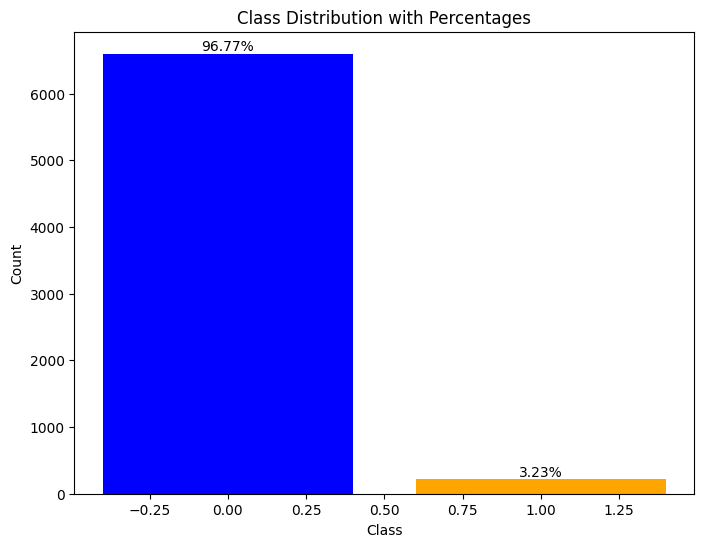

In [ ]:
# Calculate the percentage distribution
class_counts = taiwanese_y['class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=['blue', 'orange'])

for bar, percentage in zip(bars, class_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Exploratory Data Analysis

In [14]:
print(X_reduced_df.describe())

        Operating Expense Rate   Research and development expense rate  \
count             6.819000e+03                            6.819000e+03   
mean              1.995347e+09                            1.950427e+09   
std               3.237684e+09                            2.598292e+09   
min               0.000000e+00                            0.000000e+00   
25%               1.566874e-04                            1.281880e-04   
50%               2.777589e-04                            5.090000e+08   
75%               4.145000e+09                            3.450000e+09   
max               9.990000e+09                            9.980000e+09   

        Interest-bearing debt interest rate   Revenue Per Share (Yuan ¥)  \
count                          6.819000e+03                 6.819000e+03   
mean                           1.644801e+07                 1.328641e+06   
std                            1.082750e+08                 5.170709e+07   
min                          

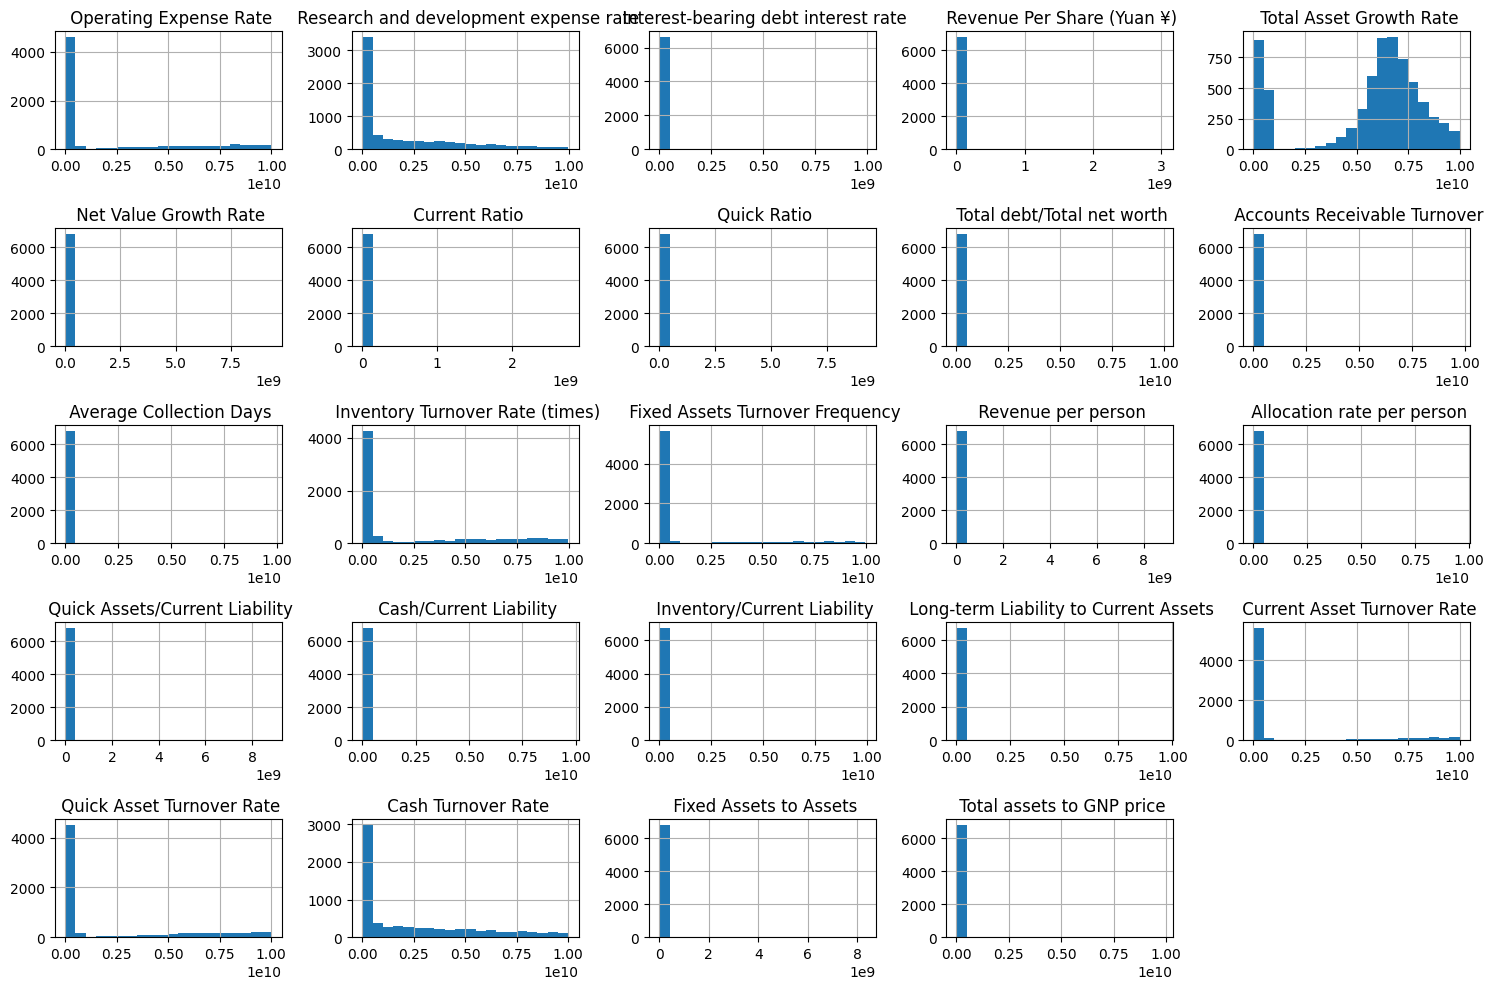

In [15]:
X_reduced_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

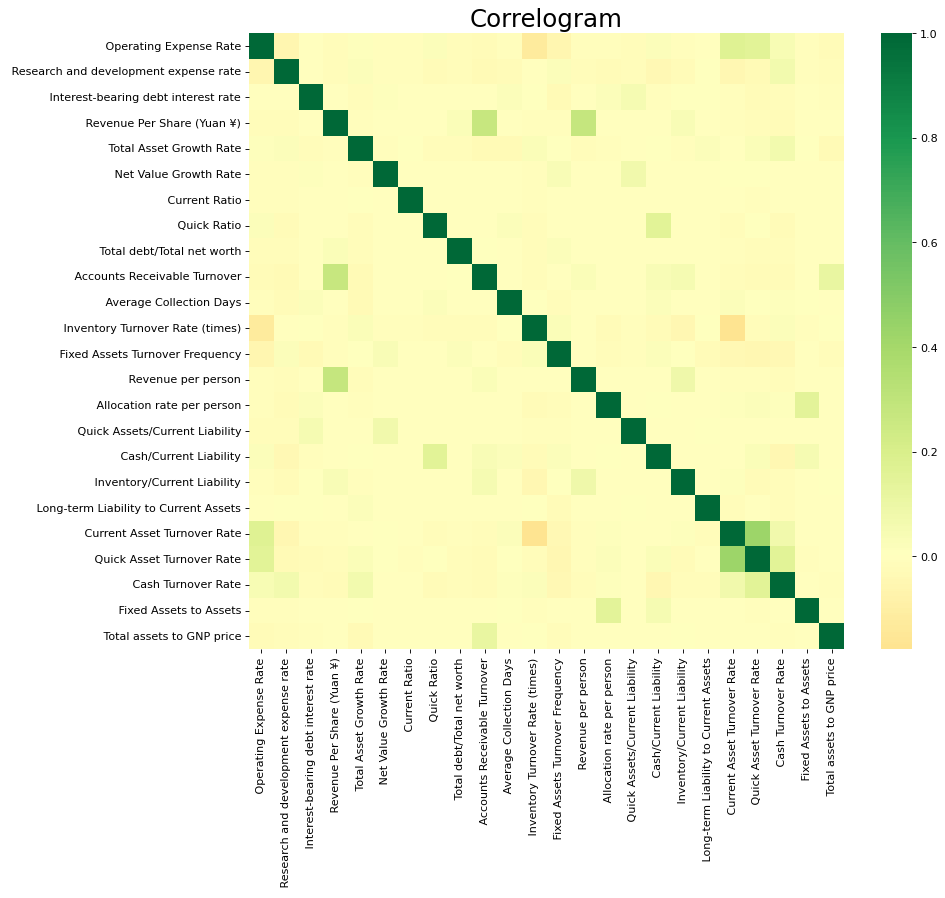

In [22]:
correlation_matrix = X_reduced_df.corr()

plt.figure(figsize=(12,10), dpi= 80) # размер картинки
sns.heatmap(correlation_matrix, cmap='RdYlGn', center=0)
plt.title('Correlogram', fontsize=22);

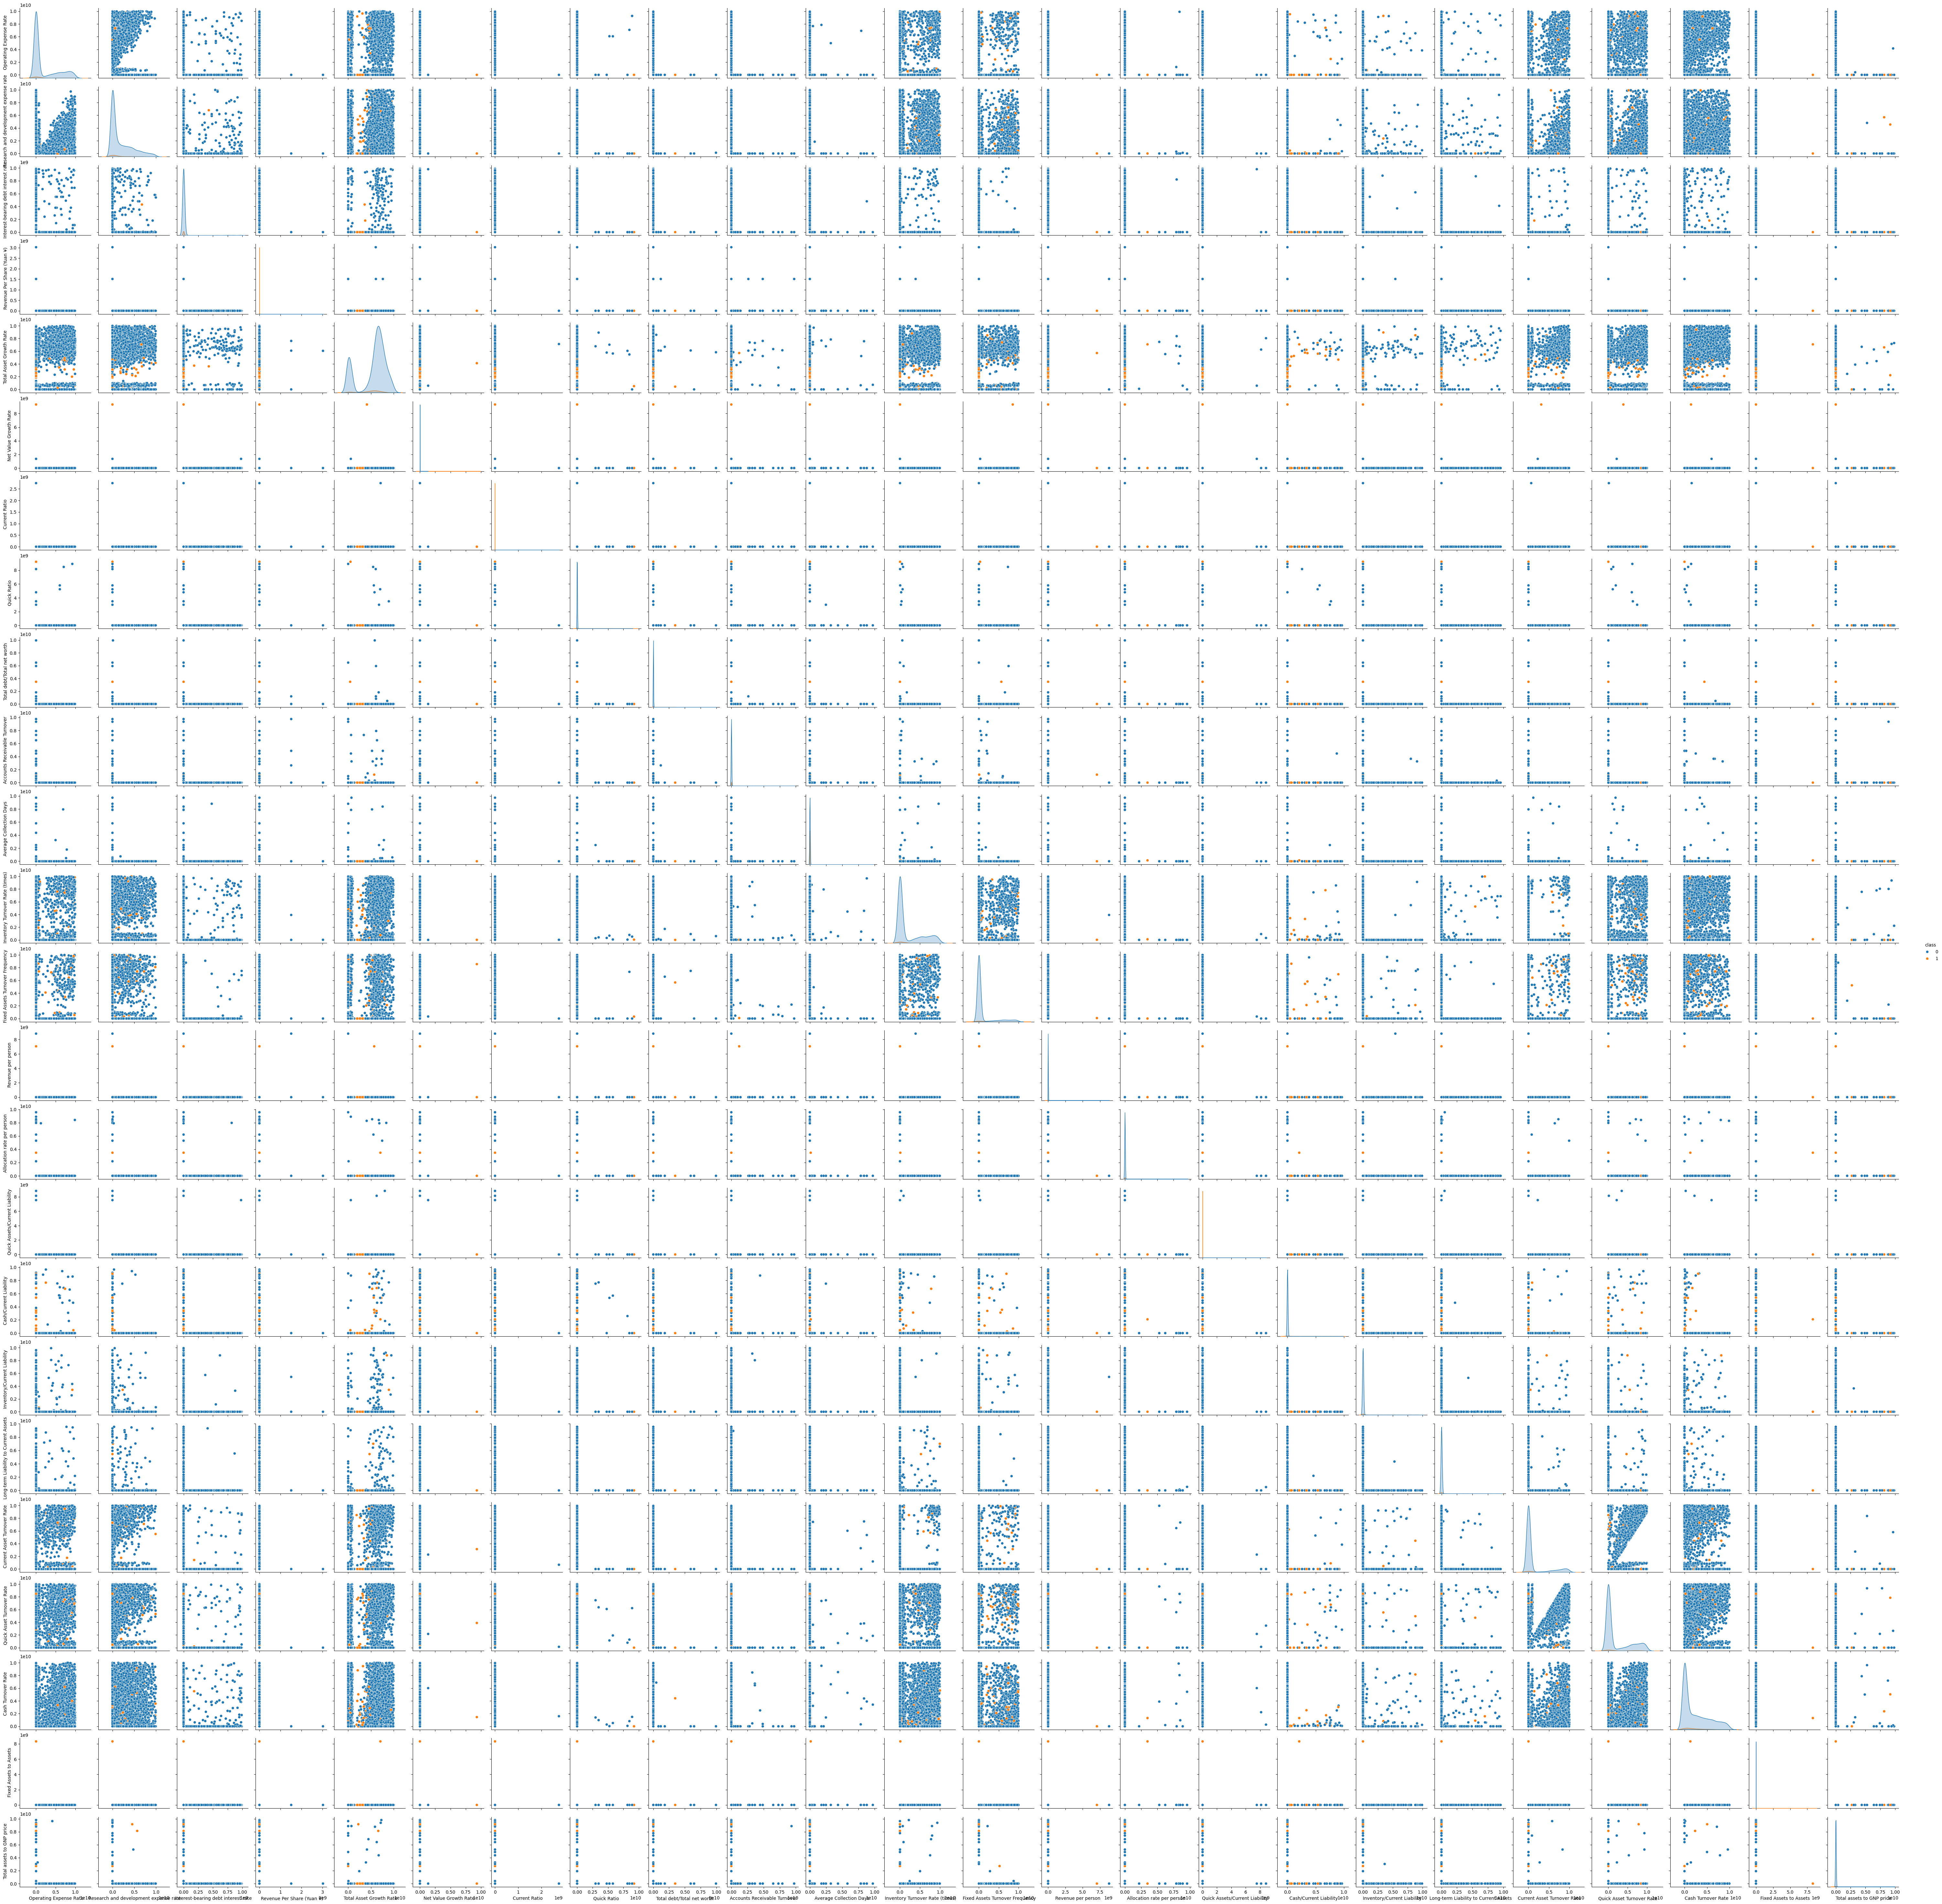

In [26]:
df_combined = X_reduced_df.copy()
df_combined['class'] = taiwanese_y['Bankrupt?']
# Создание pairplot с параметром hue
sns.pairplot(df_combined, hue='class')
plt.show()

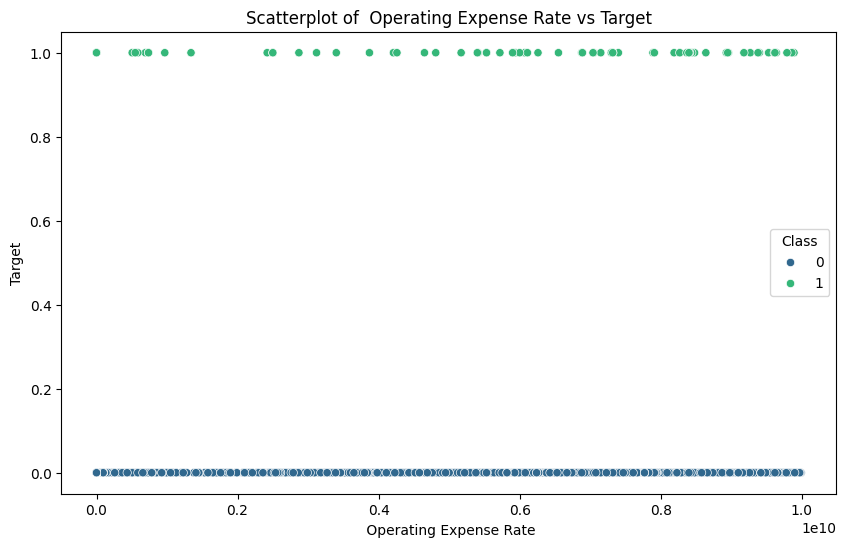

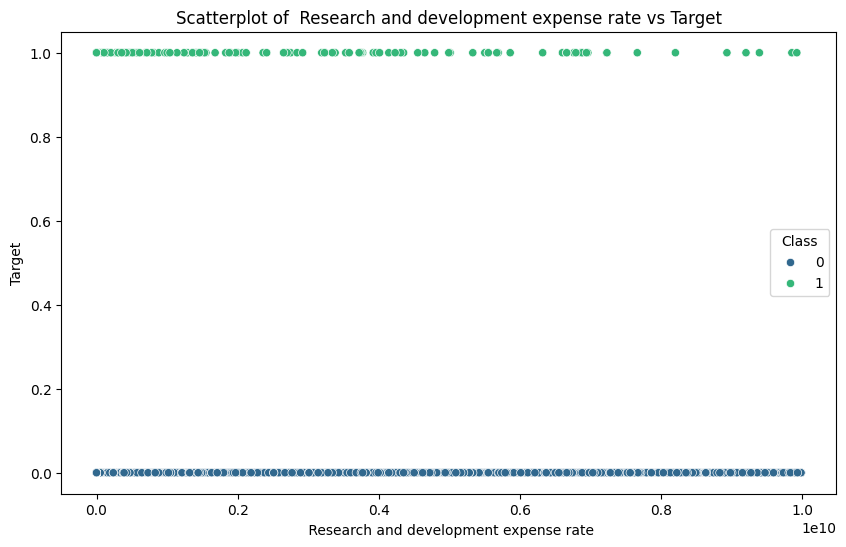

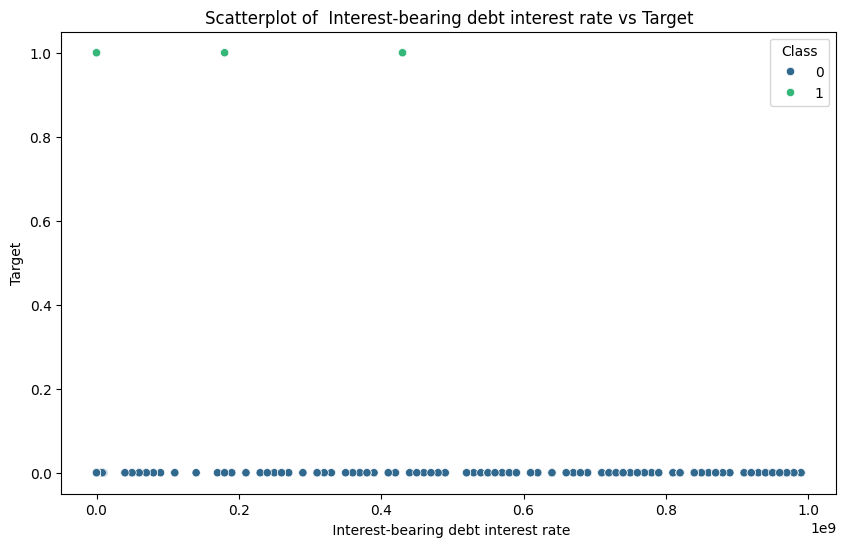

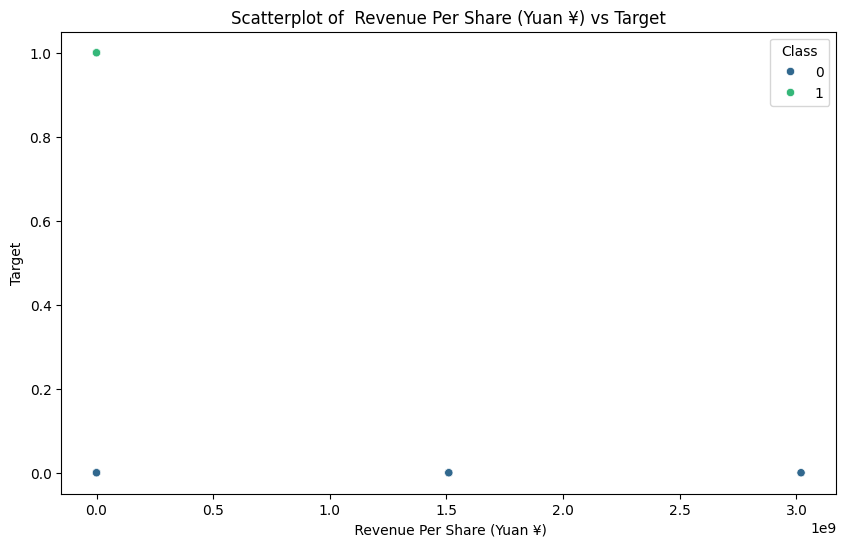

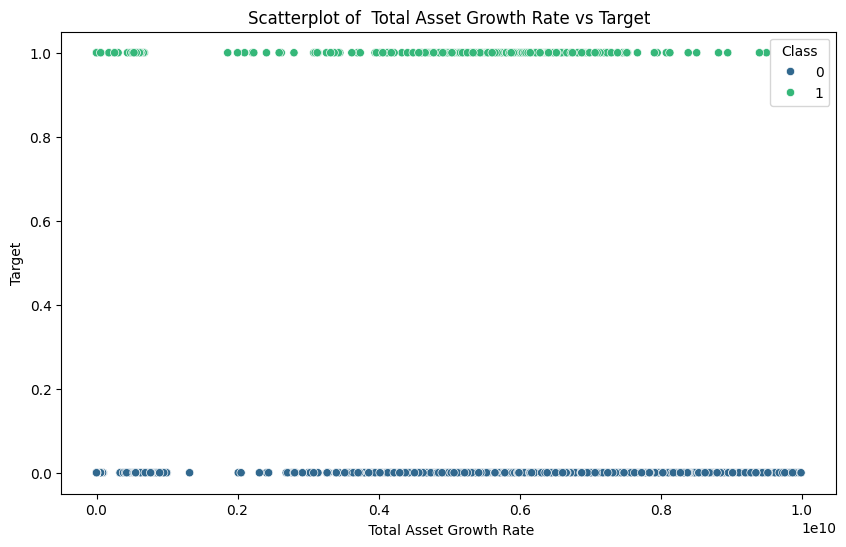

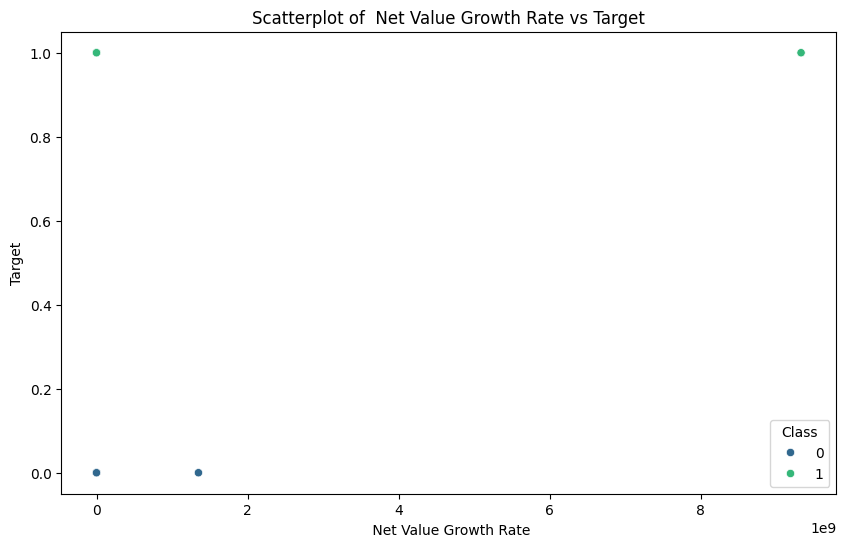

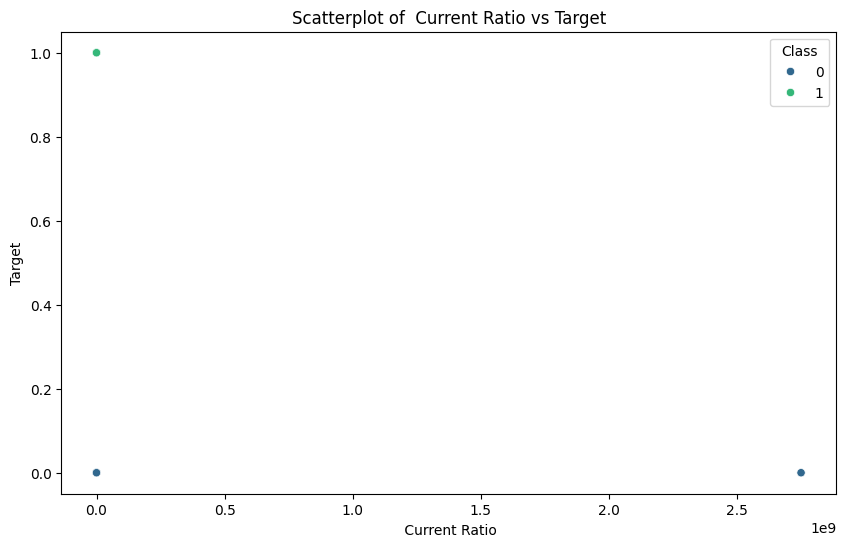

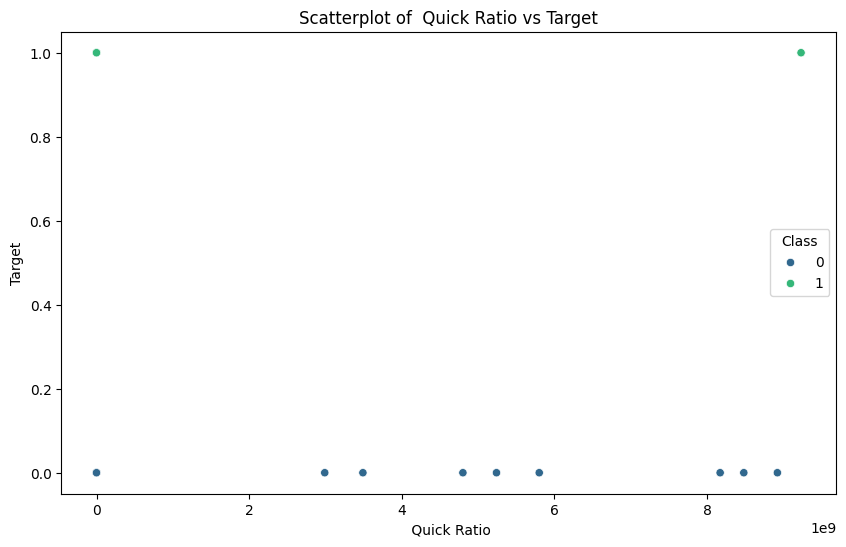

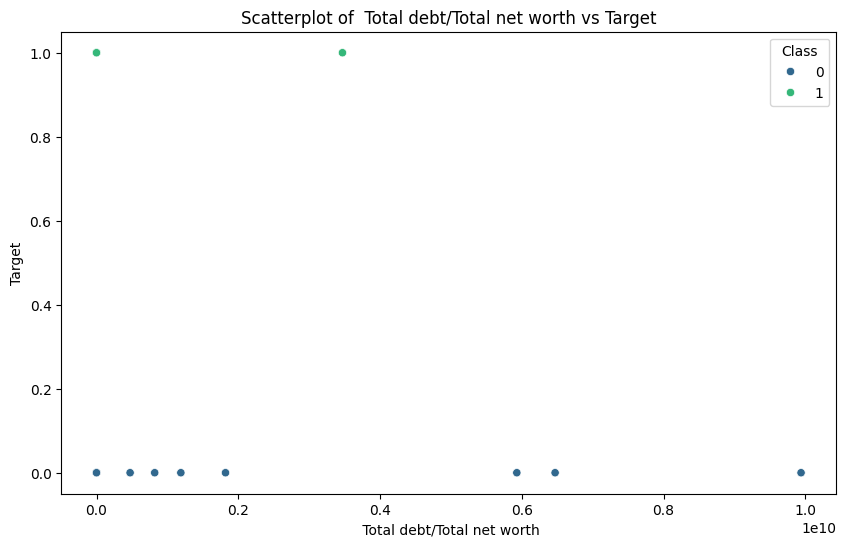

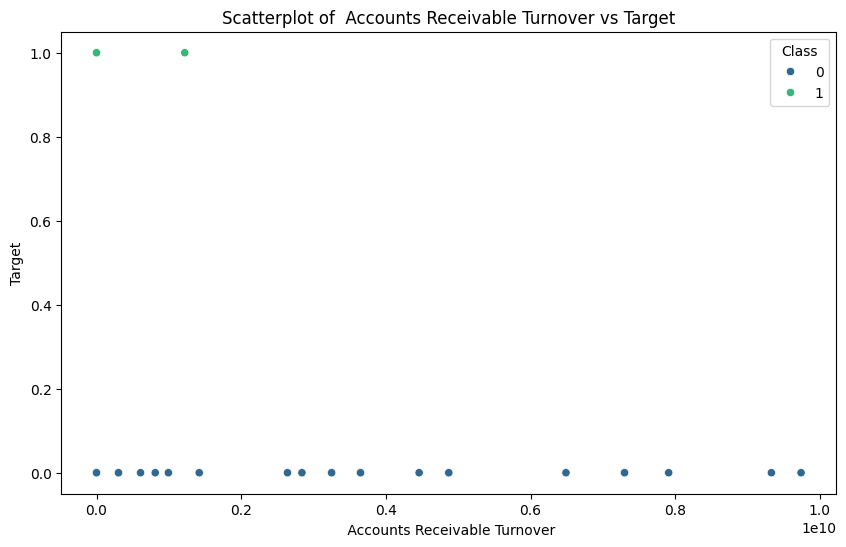

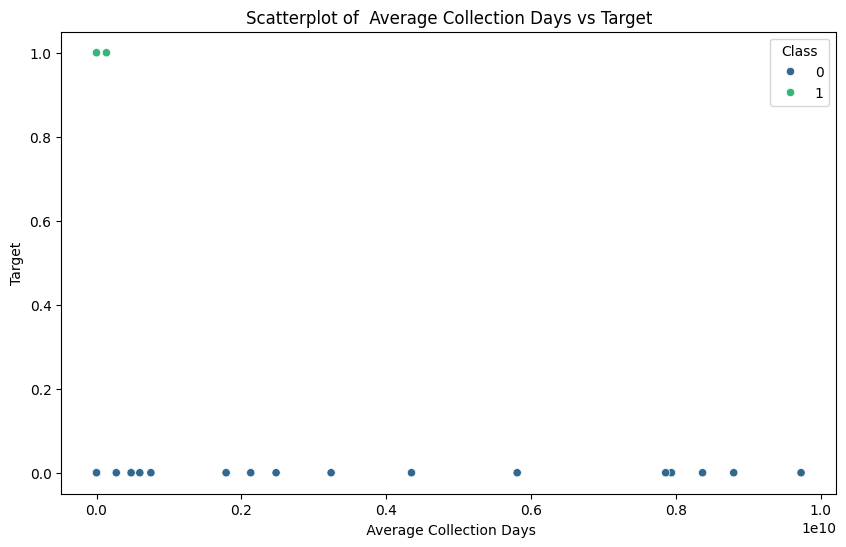

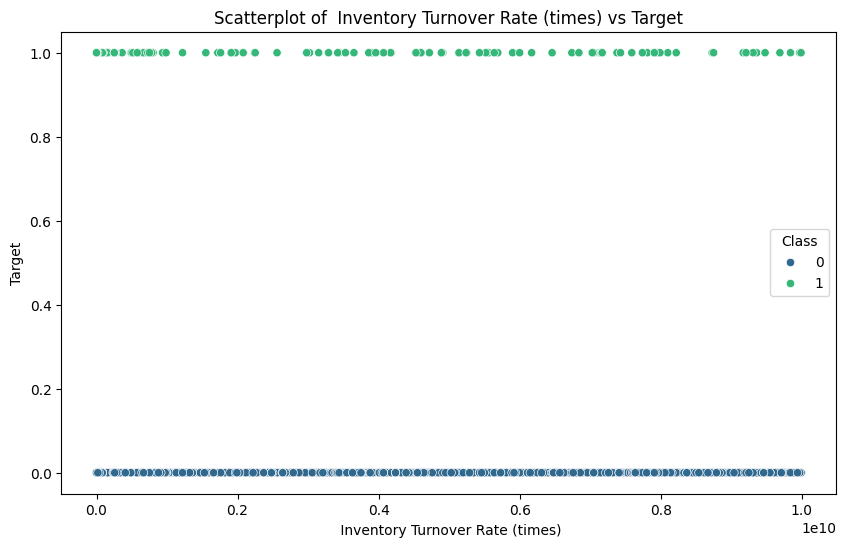

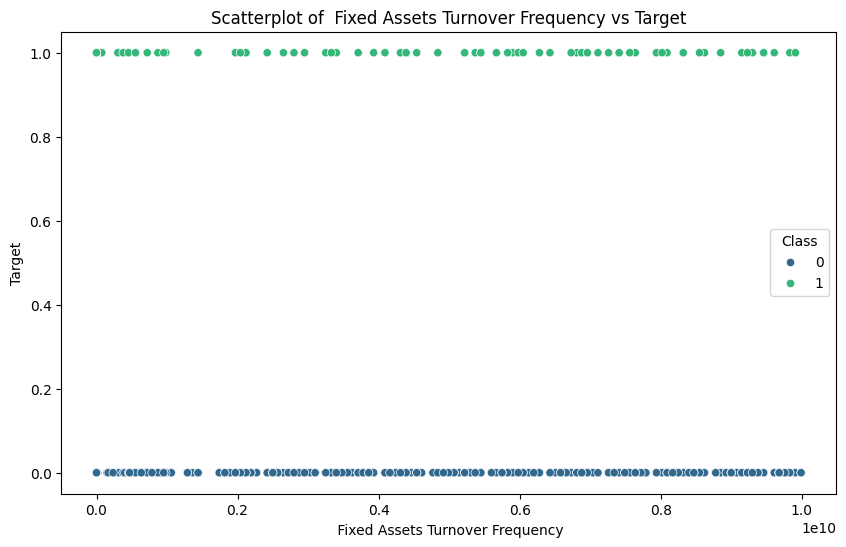

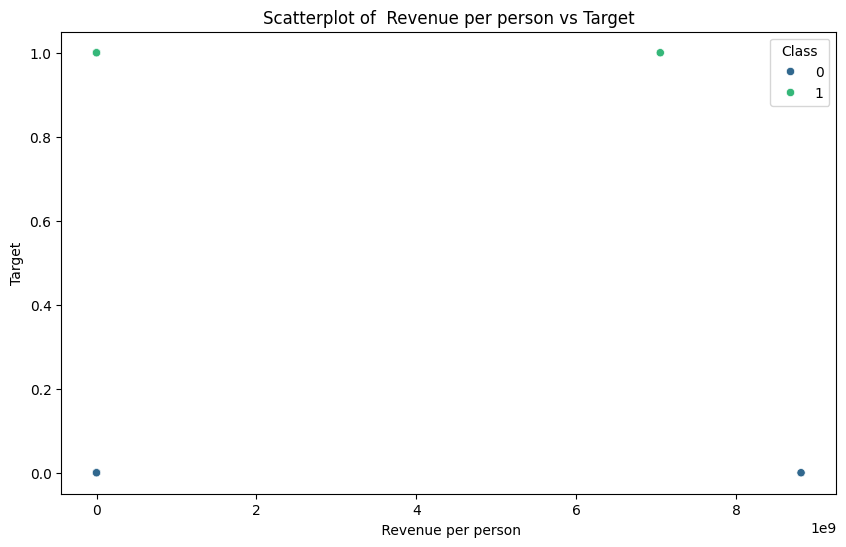

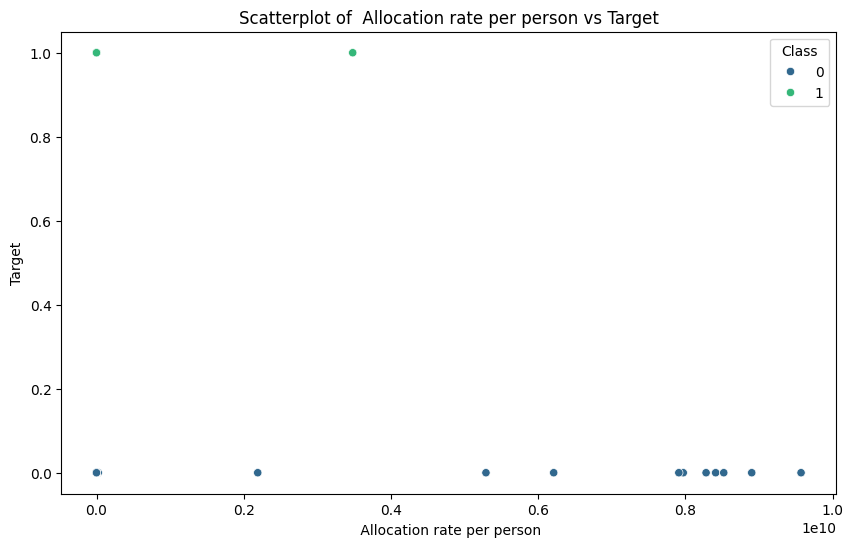

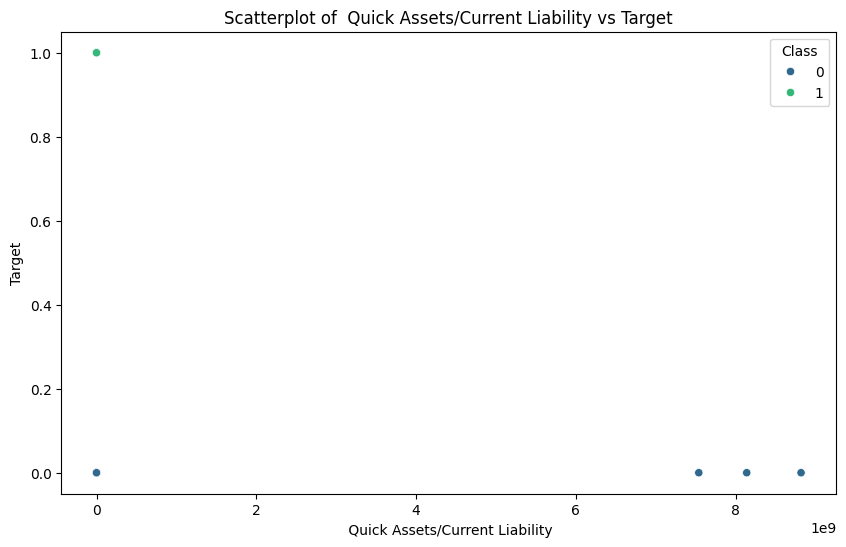

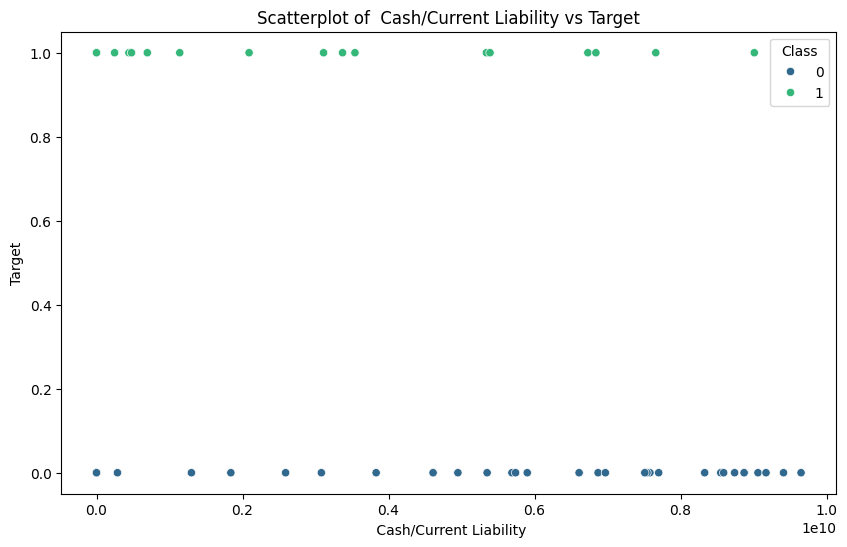

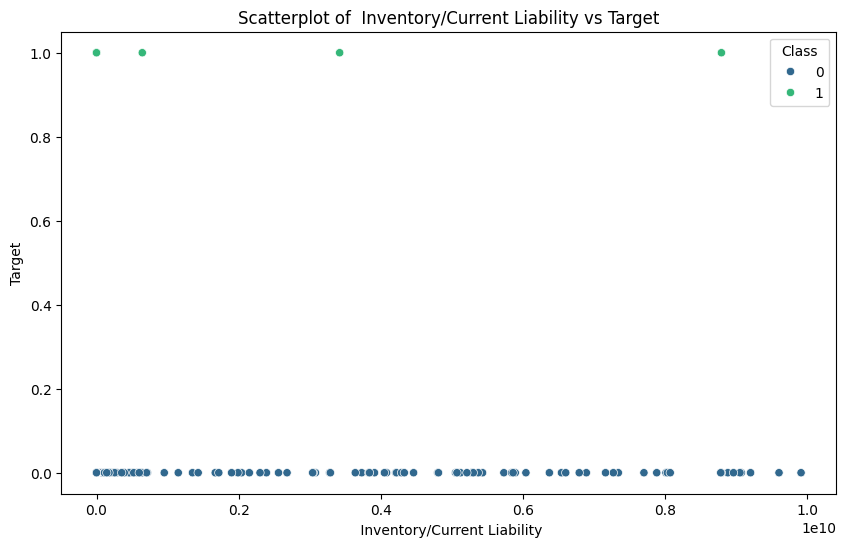

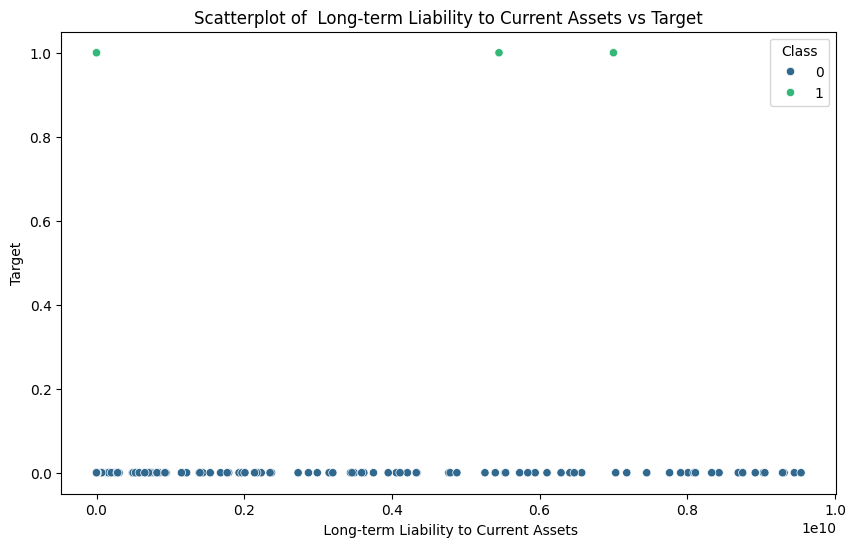

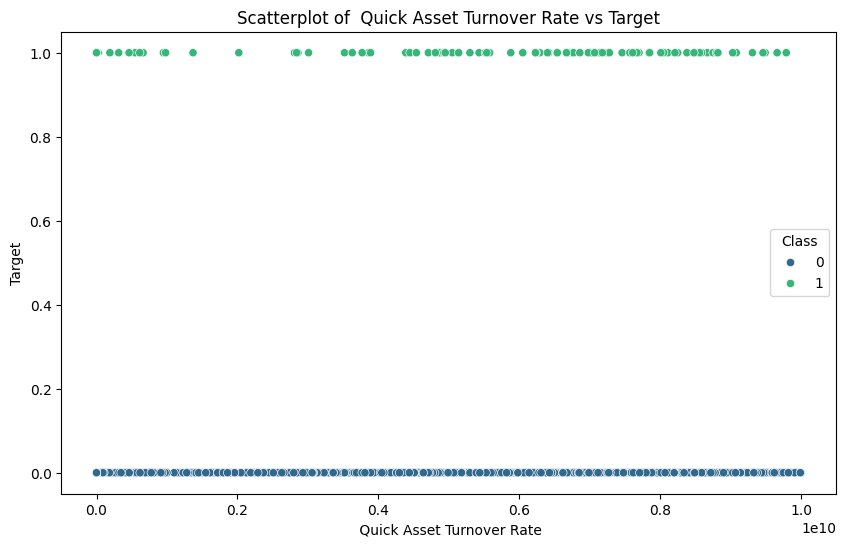

In [29]:
for column in df_combined.columns[:-1]:  # исключаем последний столбец 'target'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y='class', hue='class', data=df_combined, palette='viridis')
    plt.title(f'Scatterplot of {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.legend(title='Class')
    plt.show()

# Построение моделей

## Логистическая регрессия

## Наша модель